In [229]:
import numpy as np
import scipy as sci
import math
from scipy.optimize import curve_fit
from scipy.special import voigt_profile
import matplotlib.pyplot as plt 
import pandas as pd
import openpyxl

In [230]:
def weigh_linear_regresion(x,y,y_err):
    w = 1 / (y_err**2)
    sum_w, sum_wxy, sum_wx, sum_wy, sum_wx2 = np.sum(w), np.sum(w*x*y), np.sum(w*x), np.sum(w*y), np.sum(w*(x**2))
    delta = sum_w*sum_wx2 - (sum_wx**2)
    m = (sum_w*sum_wxy - sum_wx*sum_wy) / delta
    d_m = np.sqrt(sum_w/delta)
    b = (sum_wx2*sum_wy - sum_wx*sum_wxy) / delta
    d_b = np.sqrt(sum_wx2/delta)
    return (m,b),(d_m,d_b)

# Actividad 2

In [231]:
data_ = pd.read_excel("rayos_x_dos_actividades.xlsx",engine="openpyxl",sheet_name="Hoja2").to_numpy().T
angulos = data_[0] + 2.3
data = []
for i in range(len(data_)):
    mod = i%2
    if mod != 0:
        data.append(data_[i].tolist())
data = np.array(data)
barreras = np.array([0.02,0.04,0.06,0.08,0.1])

incer_I = 1
n = 1
d = 0.2014 #nm
def bragg (d,theta,n):
    return 2/n* (d*np.sin(np.deg2rad(theta)))

def inc_bragg (d,theta,itheta,n):
    theta_=np.deg2rad(theta)
    itheta_=np.deg2rad(itheta)
    return np.abs(2/n* (d*np.cos(theta_)*itheta_))

data

array([[369, 305, 226, 169, 136, 135, 142, 154, 158, 162, 184],
       [307, 242, 178, 132, 105, 104, 111, 116, 124, 124, 138],
       [260, 205, 151, 116,  92,  93,  96, 105, 107, 106, 105],
       [229, 178, 133, 104,  84,  85,  89,  96,  99,  99, 105],
       [205, 157, 117,  93,  77,  79,  85,  88,  89,  89,  94],
       [192, 147, 108,  87,  73,  76,  80,  85,  87,  85,  89],
       [139, 109,  80,  59,  47,  47,  47,  47,  46,  46,  51],
       [ 68,  51,  38,  30,  26,  27,  26,  25,  25,  24,  25],
       [ 40,  27,  21,  16,  15,  16,  15,  15,  14,  14,  13],
       [ 14,   9,   8,   7,   6,   6,   6,   6,   5,   5,   5]])

Aluminio

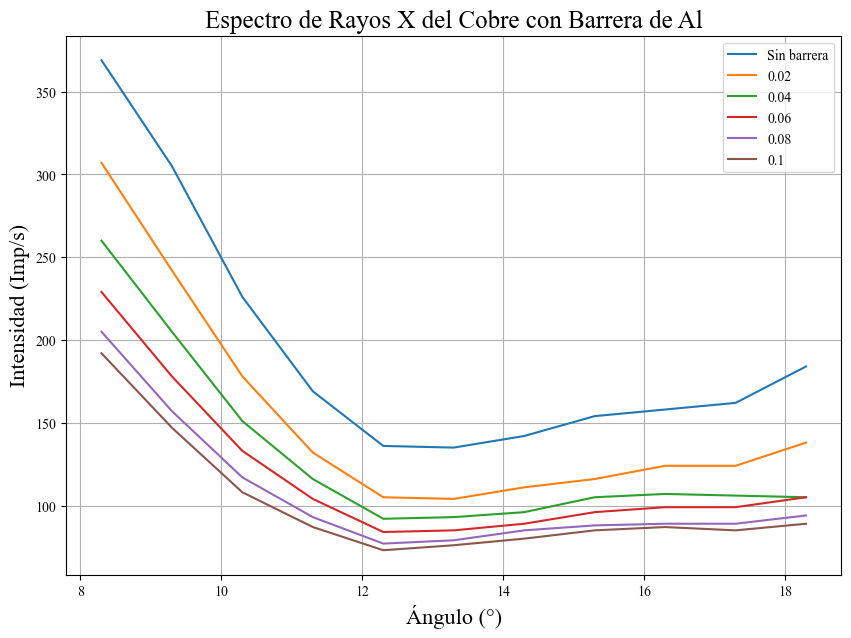

In [232]:
plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
plt.plot(angulos,data[0],label='Sin barrera')
for i in range(len(barreras)):
    plt.plot(angulos,data[i+1],label=str(barreras[i]))
plt.ylabel("Intensidad (Imp/s)", fontsize=16)
plt.title("Espectro de Rayos X del Cobre con Barrera de Al", fontsize=18)
plt.xlabel("Ángulo (°)",fontsize=16)
plt.grid(True)
plt.legend()

In [233]:
lambdas = bragg(d,angulos,n)
lambdas

array([0.05814668, 0.06509402, 0.07202153, 0.07892711, 0.08580864,
       0.09266403, 0.0994912 , 0.10628806, 0.11305255, 0.1197826 ,
       0.12647616])

In [234]:
inc_bragg(d,angulos,0.1,1)

array([0.00069566, 0.00069378, 0.00069169, 0.00068939, 0.00068688,
       0.00068416, 0.00068124, 0.0006781 , 0.00067476, 0.00067121,
       0.00066746])

In [235]:
data_Al = data[1:len(barreras) + 1].T
data_Al

array([[307, 260, 229, 205, 192],
       [242, 205, 178, 157, 147],
       [178, 151, 133, 117, 108],
       [132, 116, 104,  93,  87],
       [105,  92,  84,  77,  73],
       [104,  93,  85,  79,  76],
       [111,  96,  89,  85,  80],
       [116, 105,  96,  88,  85],
       [124, 107,  99,  89,  87],
       [124, 106,  99,  89,  85],
       [138, 105, 105,  94,  89]])

In [236]:
I0 = data[0]
I0

array([369, 305, 226, 169, 136, 135, 142, 154, 158, 162, 184])

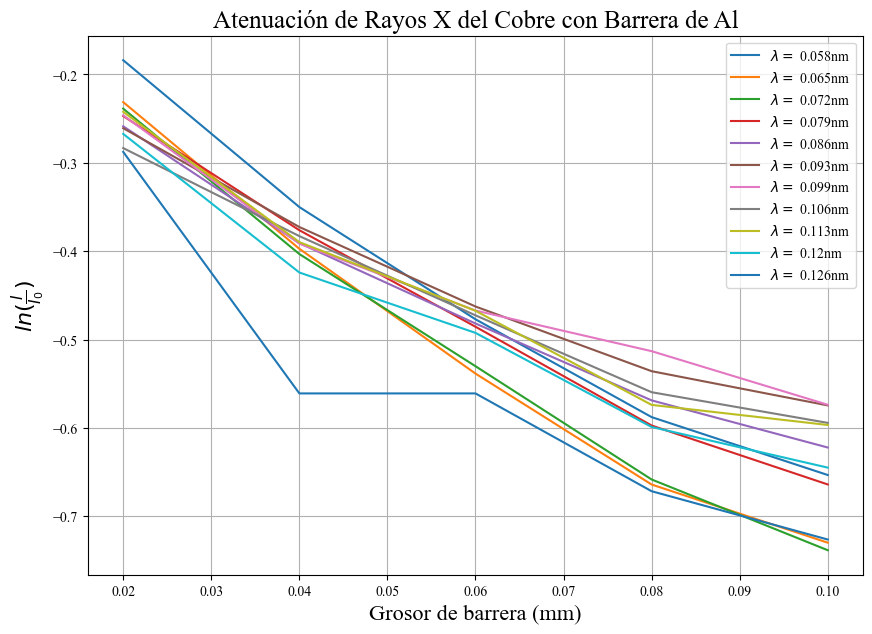

In [237]:
miu = np.zeros(len(lambdas))
incer_miu = np.zeros(len(lambdas))

plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
for i in range(len(data_Al)):
    y = np.log(data_Al[i]/I0[i])
    incer_y = (I0[i]/data_Al[i])*np.sqrt(incer_I**2 + (incer_I/(I0[i]**2))**2)
    coef,cov = np.polyfit(barreras,y, 1, cov=True,w=incer_y)
    miu[i] = coef[0]
    incer_miu[i] = np.sqrt(cov[0, 0])
    plt.plot(barreras,y,label= r'$\lambda=$' + ' ' + str(round(lambdas[i],3)) + 'nm')
plt.ylabel(r'$ln(\frac{I}{I_0})$', fontsize=16)
plt.title("Atenuación de Rayos X del Cobre con Barrera de Al", fontsize=18)
plt.xlabel("Grosor de barrera (mm)",fontsize=16)
plt.grid(True)
plt.legend()

In [238]:
miu *= -1
miu

array([5.62073422, 6.04545399, 6.05916472, 5.14559369, 4.37452963,
       3.82363167, 3.70248707, 3.89268496, 4.26970694, 4.46741299,
       4.43711637])

In [239]:
incer_miu

array([0.54687531, 0.57835662, 0.43773484, 0.33943074, 0.4013568 ,
       0.41077498, 0.51566253, 0.37747633, 0.60802853, 0.50830953,
       1.09580664])

Text(0, 0.5, 'Residual normalizado')

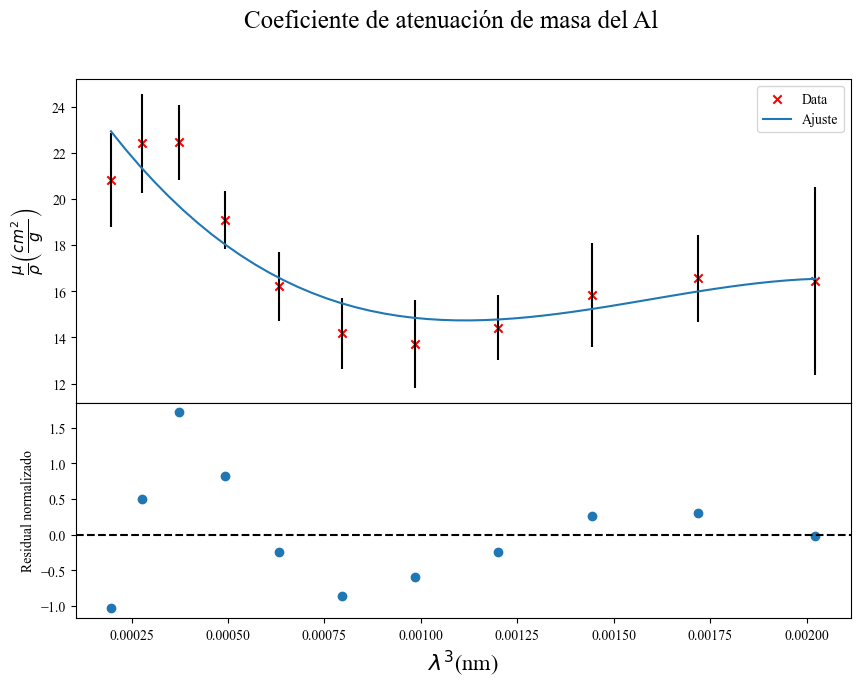

In [240]:
rho_Al = 2698*1e-9 #Kg/mm3
Z_Al = 13
y = (miu/rho_Al) * 1e-5 #cm2/g
x = lambdas**3
x_ = np.linspace(x[0],x[-1])
incer_y = np.abs((incer_miu/rho_Al)*1e-5)
coef,cov = np.polyfit(x,y,3,cov=True,w=incer_y)
model = np.poly1d(coef)
plt.rc('font', family='Times New Roman') 

fig, axs = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle("Coeficiente de atenuación de masa del Al", fontsize=18)

axs[0].scatter(x,y,marker='x',color='r',label='Data')
axs[0].errorbar(x,y,yerr= incer_y, fmt='none', ecolor='black')
axs[0].plot(x_,model(x_),label='Ajuste')
axs[0].set_ylabel(r'$\frac{\mu}{\rho} \left( \frac{cm^{2}}{g} \right)$', fontsize=16)
#axs[0].text(0.184,0.00152,'m = (109e-04 $\pm$ 2e-04)\nb = (0.6e-05 $\pm$ 2.8e-05)\n$R^{2} = 0.973$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(x,(y-model(x))/incer_y)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel(r'$\lambda^{3}$' + "(nm)",fontsize=16)
axs[1].set_ylabel('Residual normalizado')
#axs[1].set_ylim(-6.,7.5)
#axs[1].set_yticks(np.arange(-4.5, 7., 1.5))

In [241]:
y

array([20.83296596, 22.40716822, 22.45798636, 19.07188171, 16.21397196,
       14.17209662, 13.72308033, 14.42803913, 15.82545197, 16.5582394 ,
       16.44594651])

In [242]:
incer_y

array([2.02696557, 2.14364944, 1.62244194, 1.25808279, 1.48760858,
       1.52251662, 1.91127699, 1.39909684, 2.25362689, 1.88402347,
       4.06155166])

In [243]:
incer_y/y

array([0.09729606, 0.09566802, 0.07224343, 0.06596532, 0.09174856,
       0.10743058, 0.13927463, 0.09697069, 0.14240521, 0.11378163,
       0.24696369])

In [244]:
coef

array([-4.12849955e+09,  1.97404024e+07, -2.86176904e+04,  2.78269793e+01])

In [245]:
coef_err = np.sqrt(np.diagonal(cov))
coef_err

array([3.07519017e+09, 1.06210849e+07, 1.03269929e+04, 2.51126015e+00])

Zinc

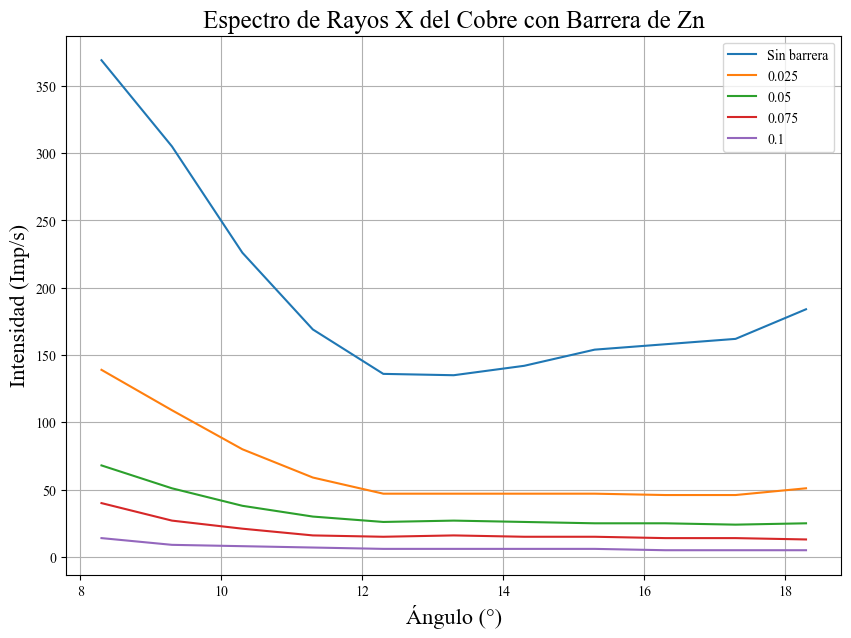

In [246]:
barreras = np.array([0.025,0.05,0.075,0.1])

plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
plt.plot(angulos,data[0],label='Sin barrera')
for i in range(len(barreras)):
    plt.plot(angulos,data[i+6],label=str(barreras[i]))
plt.ylabel("Intensidad (Imp/s)", fontsize=16)
plt.title("Espectro de Rayos X del Cobre con Barrera de Zn", fontsize=18)
plt.xlabel("Ángulo (°)",fontsize=16)
plt.grid(True)
plt.legend()

In [247]:
data_Zn = data[6:].T
data_Zn

array([[139,  68,  40,  14],
       [109,  51,  27,   9],
       [ 80,  38,  21,   8],
       [ 59,  30,  16,   7],
       [ 47,  26,  15,   6],
       [ 47,  27,  16,   6],
       [ 47,  26,  15,   6],
       [ 47,  25,  15,   6],
       [ 46,  25,  14,   5],
       [ 46,  24,  14,   5],
       [ 51,  25,  13,   5]])

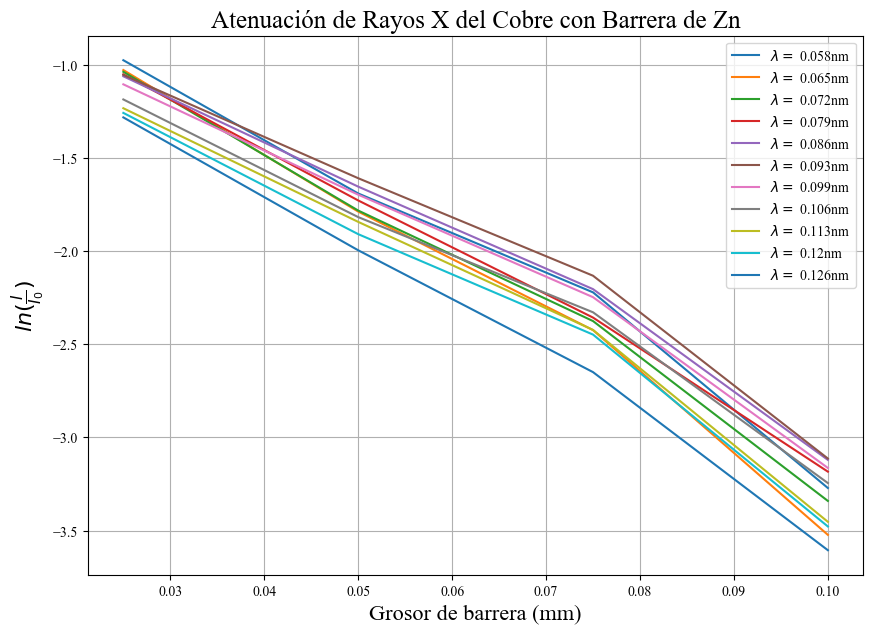

In [248]:
miu = np.zeros(len(lambdas))
incer_miu = np.zeros(len(lambdas))

plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
for i in range(len(data_Zn)):
    y = np.log(data_Zn[i]/I0[i])
    incer_y = (I0[i]/data_Zn[i])*np.sqrt(incer_I**2 + (incer_I/(I0[i]**2))**2)
    coef,cov = np.polyfit(barreras,y, 1, cov=True,w = incer_y)
    miu[i] = coef[0]
    incer_miu[i] = np.sqrt(cov[0, 0])
    plt.plot(barreras,y,label= r'$\lambda=$' + ' ' + str(round(lambdas[i],3)) + 'nm')
plt.ylabel(r'$ln(\frac{I}{I_0})$', fontsize=16)
plt.title("Atenuación de Rayos X del Cobre con Barrera de Zn", fontsize=18)
plt.xlabel("Grosor de barrera (mm)",fontsize=16)
plt.grid(True)
plt.legend()
    

In [249]:
miu *= -1
miu

array([34.38074825, 37.61030187, 33.43095622, 30.17472609, 30.73739166,
       31.5806098 , 30.73739166, 30.33426182, 34.08981396, 33.65856342,
       33.96455207])

In [250]:
incer_miu

array([3.74679509, 3.51171163, 2.73000999, 1.55268525, 2.88063366,
       3.59492655, 2.88063366, 2.9737235 , 3.58833439, 3.67290341,
       2.37476353])

Text(0, 0.5, 'Residual normalizado')

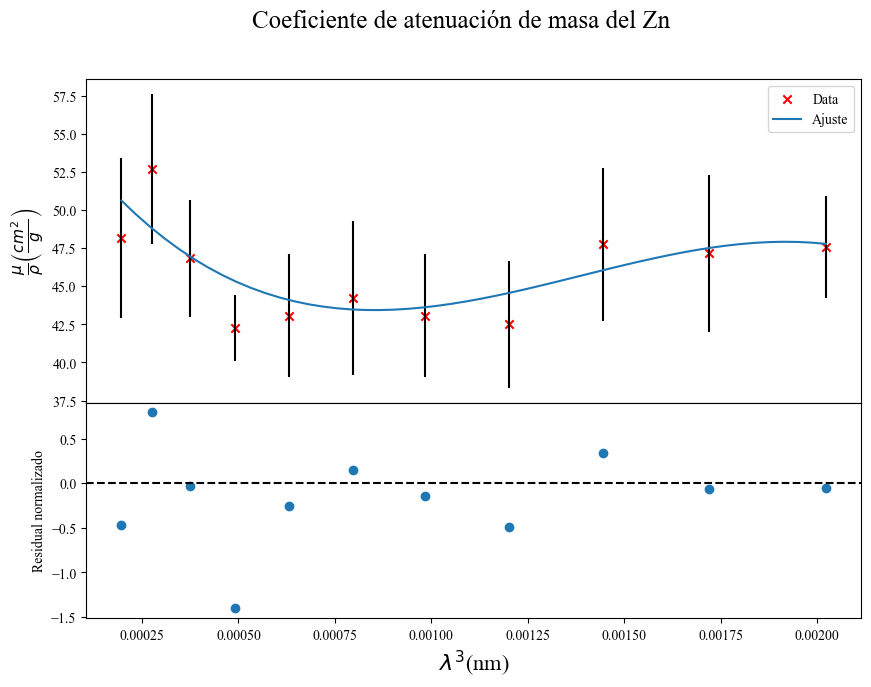

In [251]:
rho_Zn = 7138*1e-9 #Kg/mm3
Z_Zn = 30

y = (miu/rho_Zn) * 1e-5 #cm2/g
incer_y = np.abs((incer_miu/rho_Zn)*1e-5)
coef,cov = np.polyfit(x,y,3,cov=True,w=incer_y)
model = np.poly1d(coef)
plt.rc('font', family='Times New Roman') 

fig, axs = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle("Coeficiente de atenuación de masa del Zn", fontsize=18)

axs[0].scatter(x,y,marker='x',color='r',label='Data')
axs[0].errorbar(x,y,yerr= incer_y, fmt='none', ecolor='black')
axs[0].plot(x_,model(x_),label='Ajuste')
axs[0].set_ylabel(r'$\frac{\mu}{\rho} \left( \frac{cm^{2}}{g} \right)$', fontsize=16)
#axs[0].text(0.184,0.00152,'m = (109e-04 $\pm$ 2e-04)\nb = (0.6e-05 $\pm$ 2.8e-05)\n$R^{2} = 0.973$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(x,(y-model(x))/incer_y)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel(r'$\lambda^{3}$' + "(nm)",fontsize=16)
axs[1].set_ylabel('Residual normalizado')
#axs[1].set_ylim(-6.,7.5)
#axs[1].set_yticks(np.arange(-4.5, 7., 1.5))

In [252]:
y

array([48.16580029, 52.69025199, 46.83518664, 42.27336241, 43.06163023,
       44.24293892, 43.06163023, 42.49686442, 47.75821514, 47.15405355,
       47.58272916])

In [253]:
incer_y

array([5.2490825 , 4.91974171, 3.82461472, 2.17523851, 4.03563135,
       5.03632187, 4.03563135, 4.16604581, 5.02708656, 5.14556375,
       3.32693125])

In [254]:
incer_y/y

array([0.10897945, 0.093371  , 0.08166114, 0.05145648, 0.09371757,
       0.11383335, 0.09371757, 0.09803184, 0.10526119, 0.10912241,
       0.06991888])

In [255]:
coef

array([-7.40165198e+09,  3.07659996e+07, -3.63210718e+04,  5.66254212e+01])

In [256]:
coef_err = np.sqrt(np.diagonal(cov))
coef_err

array([5.22457278e+09, 1.68155208e+07, 1.54844586e+04, 3.68553096e+00])

# Actividad 4

In [257]:
data = pd.read_excel("rayos_x_dos_actividades.xlsx",engine="openpyxl",sheet_name="Hoja5").to_numpy().T
data

array([[10. , 10.1, 10.2, ..., 20.8, 20.9, 21. ],
       [ 0. ,  1. ,  0. , ...,  1. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. , ...,  1. ,  0. ,  2. ],
       ...,
       [ 5. ,  6. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

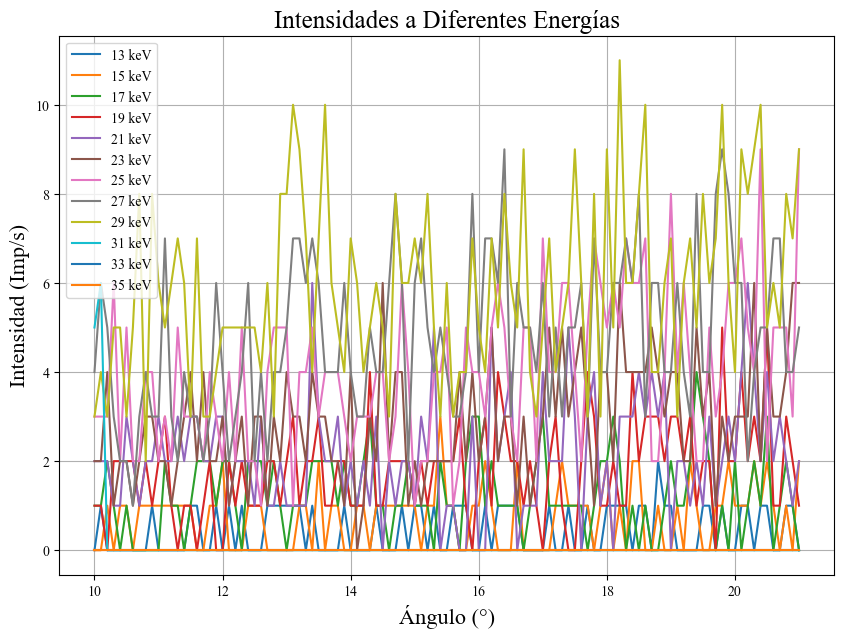

In [258]:
angulos = data[0]
energia = np.array([13,15,17,19,21,23,25,27,29,31,33,35])
plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
for i in range(len(energia)):
    plt.plot(angulos,data[i+1],label=str(energia[i])+" keV")
plt.ylabel("Intensidad (Imp/s)", fontsize=16)
plt.title("Intensidades a Diferentes Energías", fontsize=18)
plt.xlabel("Ángulo (°)",fontsize=16)
plt.grid(True)
plt.legend()